In [ ]:
!pip install -q seaborn

In [ ]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
labels = ['Surgery', 'Consult - History and Phy.', 'Cardiovascular / Pulmonary', 'Orthopedic']

In [ ]:
data = pd.read_csv('medical_data.csv')
data = data[['medical_specialty','transcription']]
category_1 = data[data['medical_specialty'].str.strip()=='Surgery'][0:300]
category_2 = data[data['medical_specialty'].str.strip()=='Consult - History and Phy.'][0:300]
category_3 = data[data['medical_specialty'].str.strip()=='Cardiovascular / Pulmonary'][0:300]
category_4 = data[data['medical_specialty'].str.strip()=='Orthopedic'][0:300]

# data with 300 rows for each category. Total 1200
data = pd.concat([category_1, category_2, category_3, category_4], axis=0)

polarities = []
for item in data['medical_specialty']:
  polarities.append(labels.index(item.strip()))

data['polarity'] = polarities
transcriptions = data['transcription']
specialities = data['medical_specialty']

transcriptions = map(lambda transcriptions: str(transcriptions), transcriptions)
transcriptions = list(transcriptions)

specialities = map(lambda specialities: str(specialities), specialities)
specialities = list(specialities)

data['transcription'] = transcriptions
data['medical_specialty'] = specialities

In [ ]:
train_size = int(len(data) * .9)
train_df = data[:train_size]
test_df = data[train_size:]

train_transcriptions = transcriptions[:train_size]
train_specialities = specialities[:train_size]

test_transcriptions = transcriptions[train_size:]
test_specialities = specialities[train_size:]

In [ ]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df['polarity'], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df['polarity'], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    test_df, test_df['polarity'], shuffle=False)


In [ ]:
embedded_text_feature_column = hub.text_embedding_column(
    key="transcription", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")


In [ ]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=4,
    optimizer=tf.keras.optimizers.Adagrad(lr=0.003))


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv89k1ede', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv89k1ede', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Training for 5,000 steps means 640,000 training examples with the default
# batch size. This is roughly equivalent to 25 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=5000);


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpv89k1ede/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpv89k1ede/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 1.4029374, step = 0


INFO:tensorflow:loss = 1.4029374, step = 0


INFO:tensorflow:global_step/sec: 43.6118


INFO:tensorflow:global_step/sec: 43.6118


INFO:tensorflow:loss = 1.2166593, step = 100 (2.296 sec)


INFO:tensorflow:loss = 1.2166593, step = 100 (2.296 sec)


INFO:tensorflow:global_step/sec: 43.4616


INFO:tensorflow:global_step/sec: 43.4616


INFO:tensorflow:loss = 0.9414499, step = 200 (2.305 sec)


INFO:tensorflow:loss = 0.9414499, step = 200 (2.305 sec)


INFO:tensorflow:global_step/sec: 44.5394


INFO:tensorflow:global_step/sec: 44.5394


INFO:tensorflow:loss = 0.8647361, step = 300 (2.241 sec)


INFO:tensorflow:loss = 0.8647361, step = 300 (2.241 sec)


INFO:tensorflow:global_step/sec: 44.3674


INFO:tensorflow:global_step/sec: 44.3674


INFO:tensorflow:loss = 0.78861237, step = 400 (2.255 sec)


INFO:tensorflow:loss = 0.78861237, step = 400 (2.255 sec)


INFO:tensorflow:global_step/sec: 44.7607


INFO:tensorflow:global_step/sec: 44.7607


INFO:tensorflow:loss = 0.84686226, step = 500 (2.242 sec)


INFO:tensorflow:loss = 0.84686226, step = 500 (2.242 sec)


INFO:tensorflow:global_step/sec: 45.2466


INFO:tensorflow:global_step/sec: 45.2466


INFO:tensorflow:loss = 0.7791209, step = 600 (2.209 sec)


INFO:tensorflow:loss = 0.7791209, step = 600 (2.209 sec)


INFO:tensorflow:global_step/sec: 45.9823


INFO:tensorflow:global_step/sec: 45.9823


INFO:tensorflow:loss = 0.72140026, step = 700 (2.172 sec)


INFO:tensorflow:loss = 0.72140026, step = 700 (2.172 sec)


INFO:tensorflow:global_step/sec: 46.1712


INFO:tensorflow:global_step/sec: 46.1712


INFO:tensorflow:loss = 0.75297487, step = 800 (2.161 sec)


INFO:tensorflow:loss = 0.75297487, step = 800 (2.161 sec)


INFO:tensorflow:global_step/sec: 45.6875


INFO:tensorflow:global_step/sec: 45.6875


INFO:tensorflow:loss = 0.64569235, step = 900 (2.191 sec)


INFO:tensorflow:loss = 0.64569235, step = 900 (2.191 sec)


INFO:tensorflow:global_step/sec: 45.783


INFO:tensorflow:global_step/sec: 45.783


INFO:tensorflow:loss = 0.7308501, step = 1000 (2.189 sec)


INFO:tensorflow:loss = 0.7308501, step = 1000 (2.189 sec)


INFO:tensorflow:global_step/sec: 46.2432


INFO:tensorflow:global_step/sec: 46.2432


INFO:tensorflow:loss = 0.700932, step = 1100 (2.155 sec)


INFO:tensorflow:loss = 0.700932, step = 1100 (2.155 sec)


INFO:tensorflow:global_step/sec: 45.8039


INFO:tensorflow:global_step/sec: 45.8039


INFO:tensorflow:loss = 0.6165581, step = 1200 (2.183 sec)


INFO:tensorflow:loss = 0.6165581, step = 1200 (2.183 sec)


INFO:tensorflow:global_step/sec: 45.7281


INFO:tensorflow:global_step/sec: 45.7281


INFO:tensorflow:loss = 0.7414061, step = 1300 (2.195 sec)


INFO:tensorflow:loss = 0.7414061, step = 1300 (2.195 sec)


INFO:tensorflow:global_step/sec: 44.763


INFO:tensorflow:global_step/sec: 44.763


INFO:tensorflow:loss = 0.67389494, step = 1400 (2.233 sec)


INFO:tensorflow:loss = 0.67389494, step = 1400 (2.233 sec)


INFO:tensorflow:global_step/sec: 46.0229


INFO:tensorflow:global_step/sec: 46.0229


INFO:tensorflow:loss = 0.6644949, step = 1500 (2.170 sec)


INFO:tensorflow:loss = 0.6644949, step = 1500 (2.170 sec)


INFO:tensorflow:global_step/sec: 45.7645


INFO:tensorflow:global_step/sec: 45.7645


INFO:tensorflow:loss = 0.6152229, step = 1600 (2.188 sec)


INFO:tensorflow:loss = 0.6152229, step = 1600 (2.188 sec)


INFO:tensorflow:global_step/sec: 46.469


INFO:tensorflow:global_step/sec: 46.469


INFO:tensorflow:loss = 0.5853497, step = 1700 (2.150 sec)


INFO:tensorflow:loss = 0.5853497, step = 1700 (2.150 sec)


INFO:tensorflow:global_step/sec: 46.0638


INFO:tensorflow:global_step/sec: 46.0638


INFO:tensorflow:loss = 0.5733304, step = 1800 (2.168 sec)


INFO:tensorflow:loss = 0.5733304, step = 1800 (2.168 sec)


INFO:tensorflow:global_step/sec: 45.7825


INFO:tensorflow:global_step/sec: 45.7825


INFO:tensorflow:loss = 0.59503484, step = 1900 (2.181 sec)


INFO:tensorflow:loss = 0.59503484, step = 1900 (2.181 sec)


INFO:tensorflow:global_step/sec: 46.6309


INFO:tensorflow:global_step/sec: 46.6309


INFO:tensorflow:loss = 0.5504823, step = 2000 (2.151 sec)


INFO:tensorflow:loss = 0.5504823, step = 2000 (2.151 sec)


INFO:tensorflow:global_step/sec: 46.4064


INFO:tensorflow:global_step/sec: 46.4064


INFO:tensorflow:loss = 0.6348911, step = 2100 (2.153 sec)


INFO:tensorflow:loss = 0.6348911, step = 2100 (2.153 sec)


INFO:tensorflow:global_step/sec: 46.6219


INFO:tensorflow:global_step/sec: 46.6219


INFO:tensorflow:loss = 0.58665395, step = 2200 (2.140 sec)


INFO:tensorflow:loss = 0.58665395, step = 2200 (2.140 sec)


INFO:tensorflow:global_step/sec: 45.7225


INFO:tensorflow:global_step/sec: 45.7225


INFO:tensorflow:loss = 0.49073184, step = 2300 (2.190 sec)


INFO:tensorflow:loss = 0.49073184, step = 2300 (2.190 sec)


INFO:tensorflow:global_step/sec: 45.6871


INFO:tensorflow:global_step/sec: 45.6871


INFO:tensorflow:loss = 0.57501644, step = 2400 (2.195 sec)


INFO:tensorflow:loss = 0.57501644, step = 2400 (2.195 sec)


INFO:tensorflow:global_step/sec: 46.0919


INFO:tensorflow:global_step/sec: 46.0919


INFO:tensorflow:loss = 0.45840442, step = 2500 (2.164 sec)


INFO:tensorflow:loss = 0.45840442, step = 2500 (2.164 sec)


INFO:tensorflow:global_step/sec: 46.008


INFO:tensorflow:global_step/sec: 46.008


INFO:tensorflow:loss = 0.5549675, step = 2600 (2.176 sec)


INFO:tensorflow:loss = 0.5549675, step = 2600 (2.176 sec)


INFO:tensorflow:global_step/sec: 45.2229


INFO:tensorflow:global_step/sec: 45.2229


INFO:tensorflow:loss = 0.5631481, step = 2700 (2.206 sec)


INFO:tensorflow:loss = 0.5631481, step = 2700 (2.206 sec)


INFO:tensorflow:global_step/sec: 44.9633


INFO:tensorflow:global_step/sec: 44.9633


INFO:tensorflow:loss = 0.5602111, step = 2800 (2.224 sec)


INFO:tensorflow:loss = 0.5602111, step = 2800 (2.224 sec)


INFO:tensorflow:global_step/sec: 44.7506


INFO:tensorflow:global_step/sec: 44.7506


INFO:tensorflow:loss = 0.5364443, step = 2900 (2.235 sec)


INFO:tensorflow:loss = 0.5364443, step = 2900 (2.235 sec)


INFO:tensorflow:global_step/sec: 45.9555


INFO:tensorflow:global_step/sec: 45.9555


INFO:tensorflow:loss = 0.57168204, step = 3000 (2.183 sec)


INFO:tensorflow:loss = 0.57168204, step = 3000 (2.183 sec)


INFO:tensorflow:global_step/sec: 45.9162


INFO:tensorflow:global_step/sec: 45.9162


INFO:tensorflow:loss = 0.42838585, step = 3100 (2.178 sec)


INFO:tensorflow:loss = 0.42838585, step = 3100 (2.178 sec)


INFO:tensorflow:global_step/sec: 46.0301


INFO:tensorflow:global_step/sec: 46.0301


INFO:tensorflow:loss = 0.55465895, step = 3200 (2.173 sec)


INFO:tensorflow:loss = 0.55465895, step = 3200 (2.173 sec)


INFO:tensorflow:global_step/sec: 45.9131


INFO:tensorflow:global_step/sec: 45.9131


INFO:tensorflow:loss = 0.49162573, step = 3300 (2.172 sec)


INFO:tensorflow:loss = 0.49162573, step = 3300 (2.172 sec)


INFO:tensorflow:global_step/sec: 46.6657


INFO:tensorflow:global_step/sec: 46.6657


INFO:tensorflow:loss = 0.50348, step = 3400 (2.143 sec)


INFO:tensorflow:loss = 0.50348, step = 3400 (2.143 sec)


INFO:tensorflow:global_step/sec: 45.6741


INFO:tensorflow:global_step/sec: 45.6741


INFO:tensorflow:loss = 0.6482043, step = 3500 (2.194 sec)


INFO:tensorflow:loss = 0.6482043, step = 3500 (2.194 sec)


INFO:tensorflow:global_step/sec: 45.6163


INFO:tensorflow:global_step/sec: 45.6163


INFO:tensorflow:loss = 0.57097036, step = 3600 (2.195 sec)


INFO:tensorflow:loss = 0.57097036, step = 3600 (2.195 sec)


INFO:tensorflow:global_step/sec: 45.9203


INFO:tensorflow:global_step/sec: 45.9203


INFO:tensorflow:loss = 0.43568775, step = 3700 (2.172 sec)


INFO:tensorflow:loss = 0.43568775, step = 3700 (2.172 sec)


INFO:tensorflow:global_step/sec: 45.8981


INFO:tensorflow:global_step/sec: 45.8981


INFO:tensorflow:loss = 0.48089224, step = 3800 (2.177 sec)


INFO:tensorflow:loss = 0.48089224, step = 3800 (2.177 sec)


INFO:tensorflow:global_step/sec: 46.7969


INFO:tensorflow:global_step/sec: 46.7969


INFO:tensorflow:loss = 0.4949814, step = 3900 (2.137 sec)


INFO:tensorflow:loss = 0.4949814, step = 3900 (2.137 sec)


INFO:tensorflow:global_step/sec: 45.6143


INFO:tensorflow:global_step/sec: 45.6143


INFO:tensorflow:loss = 0.4782042, step = 4000 (2.192 sec)


INFO:tensorflow:loss = 0.4782042, step = 4000 (2.192 sec)


INFO:tensorflow:global_step/sec: 45.7515


INFO:tensorflow:global_step/sec: 45.7515


INFO:tensorflow:loss = 0.450818, step = 4100 (2.187 sec)


INFO:tensorflow:loss = 0.450818, step = 4100 (2.187 sec)


INFO:tensorflow:global_step/sec: 46.3517


INFO:tensorflow:global_step/sec: 46.3517


INFO:tensorflow:loss = 0.5985406, step = 4200 (2.156 sec)


INFO:tensorflow:loss = 0.5985406, step = 4200 (2.156 sec)


INFO:tensorflow:global_step/sec: 45.816


INFO:tensorflow:global_step/sec: 45.816


INFO:tensorflow:loss = 0.44187278, step = 4300 (2.190 sec)


INFO:tensorflow:loss = 0.44187278, step = 4300 (2.190 sec)


INFO:tensorflow:global_step/sec: 45.9475


INFO:tensorflow:global_step/sec: 45.9475


INFO:tensorflow:loss = 0.50762004, step = 4400 (2.176 sec)


INFO:tensorflow:loss = 0.50762004, step = 4400 (2.176 sec)


INFO:tensorflow:global_step/sec: 46.6358


INFO:tensorflow:global_step/sec: 46.6358


INFO:tensorflow:loss = 0.47832763, step = 4500 (2.142 sec)


INFO:tensorflow:loss = 0.47832763, step = 4500 (2.142 sec)


INFO:tensorflow:global_step/sec: 45.9693


INFO:tensorflow:global_step/sec: 45.9693


INFO:tensorflow:loss = 0.44971967, step = 4600 (2.174 sec)


INFO:tensorflow:loss = 0.44971967, step = 4600 (2.174 sec)


INFO:tensorflow:global_step/sec: 44.647


INFO:tensorflow:global_step/sec: 44.647


INFO:tensorflow:loss = 0.508332, step = 4700 (2.237 sec)


INFO:tensorflow:loss = 0.508332, step = 4700 (2.237 sec)


INFO:tensorflow:global_step/sec: 43.6875


INFO:tensorflow:global_step/sec: 43.6875


INFO:tensorflow:loss = 0.47311422, step = 4800 (2.293 sec)


INFO:tensorflow:loss = 0.47311422, step = 4800 (2.293 sec)


INFO:tensorflow:global_step/sec: 44.0336


INFO:tensorflow:global_step/sec: 44.0336


INFO:tensorflow:loss = 0.48915344, step = 4900 (2.267 sec)


INFO:tensorflow:loss = 0.48915344, step = 4900 (2.267 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...


INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmpv89k1ede/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmpv89k1ede/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...


INFO:tensorflow:Loss for final step: 0.37077194.


INFO:tensorflow:Loss for final step: 0.37077194.


In [ ]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-09T08:30:08Z


INFO:tensorflow:Starting evaluation at 2020-06-09T08:30:08Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 1.02078s


INFO:tensorflow:Inference Time : 1.02078s


INFO:tensorflow:Finished evaluation at 2020-06-09-08:30:09


INFO:tensorflow:Finished evaluation at 2020-06-09-08:30:09


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7916667, average_loss = 0.46836206, global_step = 5000, loss = 0.47491577


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7916667, average_loss = 0.46836206, global_step = 5000, loss = 0.47491577


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-09T08:30:09Z


INFO:tensorflow:Starting evaluation at 2020-06-09T08:30:09Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.85316s


INFO:tensorflow:Inference Time : 0.85316s


INFO:tensorflow:Finished evaluation at 2020-06-09-08:30:10


INFO:tensorflow:Finished evaluation at 2020-06-09-08:30:10


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6, average_loss = 0.7967251, global_step = 5000, loss = 0.7967251


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6, average_loss = 0.7967251, global_step = 5000, loss = 0.7967251


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2rs94epr/model.ckpt-5000


Training set accuracy: 0.7916666865348816
Test set accuracy: 0.6000000238418579


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp2rs94epr/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


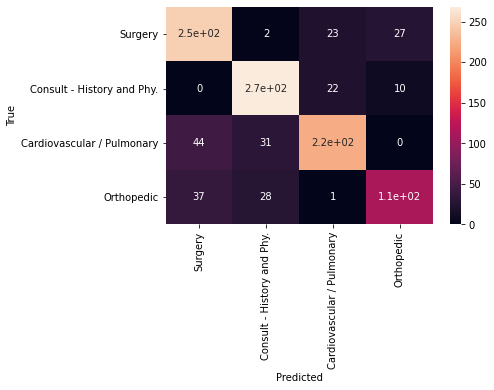

In [ ]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# Create a confusion matrix on training data.
cm = tf.math.confusion_matrix(train_df["polarity"], 
                              get_predictions(estimator, predict_train_input_fn))

# Normalize the confusion matrix so that each row sums to 1.
cm = tf.cast(cm, dtype=tf.float32)
cm = cm
cm = cm / tf.math.reduce_sum(cm, axis=1)[:, np.newaxis]

cm_graph = sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);
plt.xlabel("Predicted");
plt.ylabel("True");


In [ ]:
figure = cm_graph.get_figure()    
figure.savefig('universal_encoder_cm(after).png',bbox_inches = "tight",pad_inches=0.7)

In [ ]:
Total_actual_sum = np.sum(cm,axis=0).tolist()
print(Total_actual_sum)

Total_predicted_sum = np.sum(cm,axis=1).tolist()
print(Total_predicted_sum)

[1.1787298917770386, 1.1587867736816406, 0.9058296084403992, 0.7566541433334351]
[1.0000001192092896, 1.0000001192092896, 1.0000001192092896, 1.0]


In [ ]:
surgery_correctly_predicted = (cm[0])[0].numpy()
consult_history_phy_correctly_predicted = (cm[1])[1].numpy()
cardio_pulmonary_correctly_predicted = (cm[2])[2].numpy()
orthopedic_correctly_predicted = (cm[3])[3].numpy()

print(f' surgery_correctly_predicted  {surgery_correctly_predicted}\n consult_history_phy {consult_history_phy_correctly_predicted}\n cardio_pulmonary {cardio_pulmonary_correctly_predicted}\n orthopedic_correctly_predicted {orthopedic_correctly_predicted} ')

 surgery_correctly_predicted  0.8260523080825806
 consult_history_phy 0.8926479816436768
 cardio_pulmonary 0.7494673132896423
 orthopedic_correctly_predicted 0.6326530575752258 


In [ ]:
surgery_precision = surgery_correctly_predicted/ Total_predicted_sum[0]
consult_history_phy_precision = consult_history_phy_correctly_predicted/ Total_predicted_sum[1]
cardio_pulmonary_precision = cardio_pulmonary_correctly_predicted/ Total_predicted_sum[2]
orthopedic_precision = orthopedic_correctly_predicted/ Total_predicted_sum[3]

Total = round(np.sum(Total_actual_sum,axis=0).tolist(),0)
print(Total)

4.0


In [ ]:
precision = ((Total_actual_sum[0] * surgery_precision)+ 
             (Total_actual_sum[1] * consult_history_phy_precision)+
             (Total_actual_sum[2] * cardio_pulmonary_precision)+
             (Total_actual_sum[3] * orthopedic_precision))/Total
print(f"precision : {precision}")

recall = (surgery_recall + consult_history_phy_recall + cardio_pulmonary_recall + orthopedic_recall)/Total
print(f'recall : {recall}')

F1_score = 2 * ((precision * recall)/(precision + recall))
print(f"F1_score : {F1_score}")

recall : 0.784325958110065
F1_score : 0.787855789149332


In [ ]:
surgery_recall = surgery_correctly_predicted/ Total_actual_sum[0]
consult_history_phy_recall = consult_history_phy_correctly_predicted/ Total_actual_sum[1]
cardio_pulmonary_recall = cardio_pulmonary_correctly_predicted/ Total_actual_sum[2]
orthopedic_recall = orthopedic_correctly_predicted/ Total_actual_sum[3]
